### Load Modules

In [6]:
from kmodes.kprototypes import KPrototypes
from kmodes.kmodes import KModes
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import pickle
import time
import matplotlib.pyplot as plt

In [13]:
##### option to remove scientific notation
pd.set_option('display.float_format', lambda x: '%.5f'% x)

### Load Data

In [12]:
chunksize = 10**6

In [13]:
rt = pd.read_table("../Data/Cleaned/df.csv", chunksize = chunksize,  sep = ",", low_memory = False)

In [14]:
df = pd.concat(rt,ignore_index = True)

In [15]:
df.reset_index(drop = True, inplace = True)

### Normalize numerical inputs

In [9]:
### normalize numerical inputs
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(df[['QUALITY_EV',
       'PRICE_EV', 'PROMOTIONS_EV', 'AMBIANCE_EV', 'WIFI_EV', 'SERVICE_EV']].values)
df[['QUALITY_EV',
       'PRICE_EV', 'PROMOTIONS_EV', 'AMBIANCE_EV', 'WIFI_EV', 'SERVICE_EV']] = pd.DataFrame(x_scaled)

### Find optimal number of clusters with elbow method

In [39]:
### Finding the optimal number of cluster  
start_time = time.time()
kp_cost = []
K = [] 
for k in list(range(1, 30)):
    try:
        kp = KPrototypes(n_clusters=k, init='Huang', n_init=1, verbose=False)
        kp.fit_predict(df, categorical=[0,1,2,3,4,5,6,7,8,9,17])
        kp_cost.append(kp.cost_)
        K.append(k)
    except:
        print("---cluster =  %s did not converge"% k)

print("--- %s seconds ---" % (time.time() - start_time))

---cluster =  26 did not converge
---cluster =  28 did not converge
---cluster =  29 did not converge
--- 10.440952777862549 seconds ---


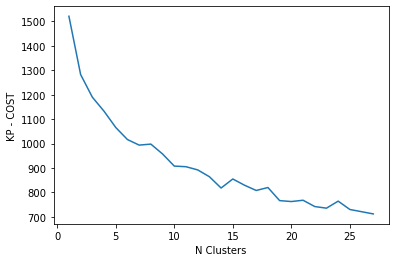

In [41]:
## Find the elbow
plt.plot(K, kp_cost)
plt.ylabel('KP - COST')
plt.xlabel('N Clusters')
plt.show()

### Running the modelwith 10 clusters (hugest change in the slope)

In [42]:
start_time = time.time()
kp = KPrototypes(n_clusters=10, init='Huang', n_init=3, verbose=True)
kp.fit_predict(df, categorical=[0,1,2,3,4,5,6,7,8,9,17])
print("--- %s seconds ---" % (time.time() - start_time))

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 40, ncost: 972.6832098871664
Run: 1, iteration: 2/100, moves: 17, ncost: 930.0830506299985
Run: 1, iteration: 3/100, moves: 14, ncost: 901.719058033978
Run: 1, iteration: 4/100, moves: 2, ncost: 900.0939041749716
Run: 1, iteration: 5/100, moves: 1, ncost: 899.1737779014227
Run: 1, iteration: 6/100, moves: 0, ncost: 899.1737779014227
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 35, ncost: 979.7509033106858
Run: 2, iteration: 2/100, moves: 10, ncost: 961.149151141757
Run: 2, iteration: 3/100, moves: 3, ncost: 957.8171676440735
Run: 2, iteration: 4/100, moves: 0, ncost: 957.8171676440735
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 

In [43]:
Labels = kp.labels_

In [44]:
#### Store the model binary for future usage
with open('../Bin/kprototypes.pickle', 'wb') as f:
    pickle.dump(kp, f)

In [45]:
### de normalize the data set to retrieve full output
rt = pd.read_table("../Data/Cleaned/df.csv", chunksize = chunksize,  sep = ",", low_memory = False)

In [46]:
df_final = pd.concat(rt,ignore_index = True)

In [47]:
df_final['Labels'] = Labels

In [48]:
df_final.to_csv('../Outputs/model_13_03_21.csv', index = False)